# Required assignment 6.1: Implementing performance evaluation metrics

In this notebook, you’ll fit polynomials to three-dimensional data to determine which polynomial order provides the best fit. Since the data can’t be visualised directly, you’ll write functions to calculate performance metrics that help assess model accuracy.

In [40]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pathlib as pl
import os
import pandas as pd

## Metrics for model selection



In [41]:
#Set random seed for reproducibility
seed = 2022
np.random.seed(seed)

## Load the data

In [42]:
data = pd.read_csv('data/M6_Performance_Metrics_Data.csv')

In [43]:
print(data.head())

   Unnamed: 0        x1        x2        x3          y
0           0  0.382303 -1.596593  1.233776   4.935364
1           1  1.902436  1.579109 -0.341741  25.138660
2           2 -1.689244  1.298489 -1.472081  -4.786340
3           3 -1.510509  1.937616 -1.600244  -3.185759
4           4  1.621717  0.515558 -1.869644  19.712731


## Section 1: Split the data into training, validation and test sets.

### Prompt 1: Write a function that splits the data into training, validation and test sets.

The function should take the data frame and the percentage splits for training, validation and test as inputs and return three separate data frames – one for each set.

Hint:

- Select the `training` set with a fraction provided by the `data_split[0]`.

- To select the `validation` set, use `df.drop(training_index)` to exclude the training data and then rescale the validation fraction relative to the remaining rows.

- Once the training and validation rows are removed, the remaining rows are the test set.

In [44]:
###GRADED
def split_dataframe(df, data_split):
    """
    Function to divide a dataframe into training, validation and test dataframes

    :param df: the full dataframe which is to be divided
    :param data_split: a list containing the fraction of the full dataframe for each
    of training, validation and test, in that order
    :return: training, validation, test: dataframes for each of the sets
    """

# YOUR CODE HERE
    
    # Set random_state for reproducibility
    np.random.seed(42)

    # Split the training set
    training_df = df.sample(frac=data_split[0], random_state=42)

    # Split the validation set from the remaining data
    remaining_df = df.drop(training_df.index)
    validation_df = remaining_df.sample(frac=data_split[1]*len(df)/len(df.drop(training_df.index)), random_state=42)

    # The rest of the data is the test set
    test_df = remaining_df.drop(validation_df.index)
    
    return training_df, validation_df, test_df

### Prompt 2: Use your function to split the data set into three parts: 40 per cent for training, 30 per cent for validation and 30 per cent for testing.

In [45]:
###GRADED
training, validation, test = None, None, None

# YOUR CODE HERE
training, validation, test = split_dataframe(data, [0.4, 0.3, 0.3])

print(len(training))
print(len(validation))
print(len(test))


40
30
30


## Section 2: Write metrics functions

### Prompt 3: Write functions to calculate the metrics you will use to evaluate your model’s performance.

- The mean absolute error (MAE):  
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

- The average error (AE):
$$
\text{AE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

- The mean absolute percentage error (MAPE):
$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$

- The root mean squared error (RMSE):
$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

- The total sum of squared errors (SSE):
$$
\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In [46]:
##Write your code here ##
##GRADED CELL
def RMSE(predictions, test_y):
    """function to compute RMSE
    :param predictions: the predicted values
    :param test_y: the true values
    :return RMSE: the root mean squared error"""
    pass
def mean_abs_error(predictions, test_y):
    """function to compute mean absolute error
    :param predictions: the predicted values
    :param test_y: the true values
    :return MAE: the mean absolute error"""
    pass
def average_error(predictions, test_y):
    """function to compute average error
    :param predictions: the predicted values
    :param test_y: the true values
    :return AE: the average error"""
    pass
def mean_abs_percent_error(predictions, test_y):
    """function to compute mean absolute percentage error
    :param predictions: the predicted values
    :param test_y: the true values
    :return MAPE: the mean absolute percentage error"""
    pass
def total_sum_squared_error(predictions, test_y):
    """function to compute total sum of squared errors
    :param predictions: the predicted values
    :param test_y: the true values
    :return SSE: the total sum of squared errors"""
    pass
# YOUR CODE HERE
#raise NotImplementedError()
def RMSE(predictions, test_y):
    return np.sqrt(np.mean((predictions - test_y)**2))

def mean_abs_error(actual_values, predictions):
    return np.mean(np.abs(actual_values - predictions))

def average_error(predictions, test_y):
    return np.mean(predictions - test_y)

def mean_abs_percent_error(predictions, test_y):
    return np.mean(np.abs((predictions - test_y)/test_y)*100)

def total_sum_squared_error(predictions, test_y):
    return np.sum((predictions - test_y)**2)

## Section 3: Fit models to the training data and calculate performance metrics for the validation set.

For polynomials of order 1, 2, 3 and 4, use `fit_model` to fit each model. This function uses the scikit-learn polynomial regression.

### Prompt 4: Write functions to convert a data frame into `NumPy` arrays.

Scikit-learn functions require NumPy arrays as input. To prepare your data, write a function that converts a data frame with columns [x1, x2, x3, y] into two `NumPy` arrays: X and y. X should have the shape (N, D), where N is the number of samples and D is the number of features (three in this case). y should have the shape (N,).

In [47]:
###GRADED CELL
def convert_to_numpy(df):
  """function to convert to numpy
    :param df: the dataframe given
    :param X: convert to numpy array of shape (N, D)
    :param y: convert to numpy array of shape (N, )
    :return X,y: the numpy arrays"""
pass
# YOUR CODE HERE
#raise NotImplementedError()
def convert_to_numpy(df):

    # Select the feature columns and convert to a NumPy array
    X = df[['x1', 'x2', 'x3']].to_numpy()
    
    # Select the target column and convert to a NumPy array.
    y = df[['y']].to_numpy() # The double brackets will return a 2D data structure
    
    return X, y


### Fitting the model for polynomials of order 1 to 6, inclusive

1. Fit a polynomial to the training data using the `fit_model` function.

2. Use the `model.predict(X)` function to get the model predictions on the validation set.

3. Store the model in a dictionary of models in which the keys indicate the order and the items are the models.

4. Store the predictions in a separate dictionary in which the keys indicate the order and the items are `NumPy` arrays of the predictions.

In [48]:
def fit_model(X, y, order):
    model = Pipeline([('poly', PolynomialFeatures(degree=order)),
                      ('linear', LinearRegression(fit_intercept=False))])
    model = model.fit(X, y)
    return model

## Section 4: Calculate performance metrics for each model.

Now let's calculate the performance metrics for each model.

### Prompt 5: Use your dictionary of predictions to calculate and record each metric – either by storing the results in a data frame or by plotting them on a graph.

1. Calculate each metric for the models using the functions you previously defined.

2. Store the results in a data frame with one row per model, or display them using a graph.

Hint:
- For computing `model_dict()`, iterate the different orders and compute `fit_model()`.

- For computing `predictions_dict(order)`, iterate the different orders and use the `model_dict(order).predict()` on `X_valid`.

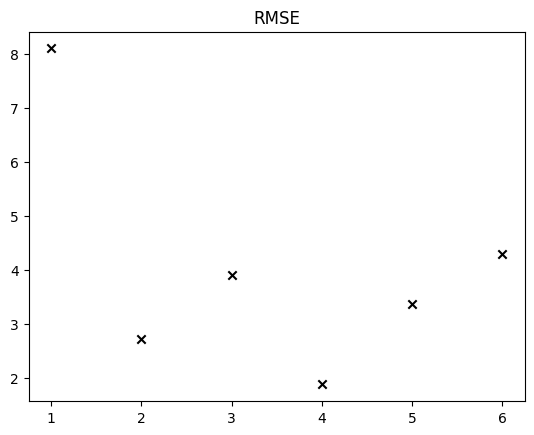

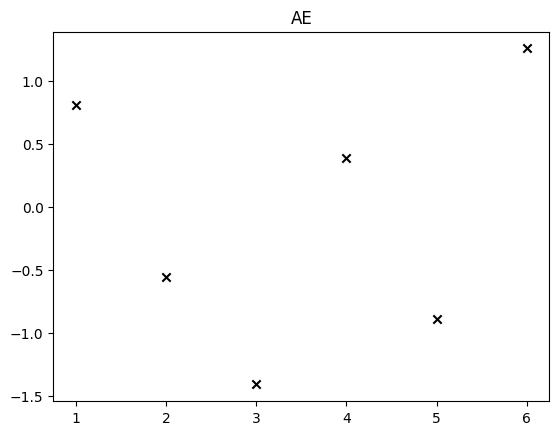

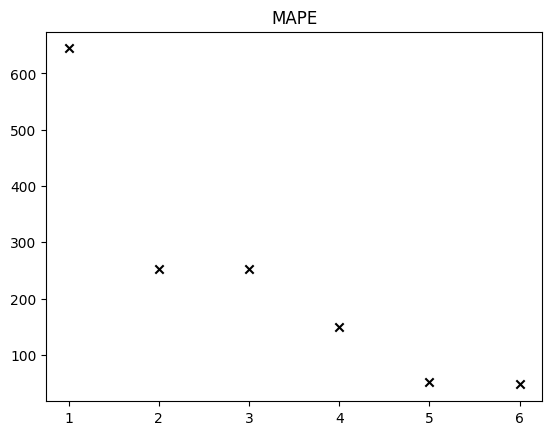

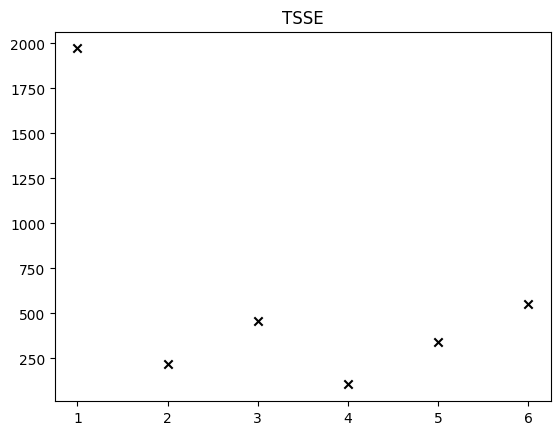

,Order,RMSE,AE,MAPE,SSE
0,1,8.107458,0.814846,644.217908,1971.926096
1,2,2.714870,-0.557952,253.034858,221.115598
2,3,3.904711,-1.408959,251.683835,457.402992
3,4,1.876042,0.390588,148.671571,105.585988
4,5,3.372759,-0.889861,52.397729,341.265035
5,6,4.289745,1.260715,47.357306,552.057287


In [49]:
###GRADED CELL
#Initialise dictionaries to store the models and predictions
models_dict = {}
predictions_dict = {}

#Convert the training and validation data to NumPy arrays
X_train, y_train = convert_to_numpy(training)
X_valid, y_valid = convert_to_numpy(validation)

methods = [RMSE, average_error, mean_abs_percent_error, total_sum_squared_error]
method_names = ["RMSE", "AE", "MAPE", "TSSE"]
import matplotlib.pyplot as plt

#Fit the models and store predictions for each order
# YOUR CODE HERE
for order in range(1, 7):
    # Fit the model to the training data
    model = fit_model(X_train, y_train, order)
    # Get predictions on the validation data
    predictions = model.predict(X_valid)
    # Store the model and predictions
    models_dict[order] = model
    predictions_dict[order] = predictions

#Now you can plot the metrics
for i, method in enumerate(methods):
    fig = plt.figure()
    for order in [1, 2, 3, 4, 5, 6]:
        res = method(predictions_dict[order], y_valid)
        plt.scatter(order, res, marker='x', color='k')
    plt.title(method_names[i])
    plt.show()

results = []
for order in range(1,7):
    preds = predictions_dict[order]
    results.append({
        "Order": order,
        "RMSE": RMSE(preds, y_valid),
        "AE": average_error(preds, y_valid),
        "MAPE": mean_abs_percent_error(preds, y_valid),
        "SSE": total_sum_squared_error(preds, y_valid),
    })
pd.DataFrame(results)

## Section 5: Use the test set to evaluate the performance of your selected model.

### Prompt 6: For your selected model, calculate the RMSE, AE and MAPE of the test data.

HINT:

- Compute the `RMSE()`, `average_error()` and `mean_abs_percent_error()` for the model of order 4.

- Use `convert_to_numpy()` on the test data set.

In [50]:
###GRADED CELL
X_test, y_test = None, None
y_new = None

# YOUR CODE HERE
#raise NotImplementedError()

# Convert the test data into NumPy arrays
X_test, y_test = convert_to_numpy(test)

# Get the model of order 4 from the dictionary
# and make predictions on the test set
y_new = models_dict[4].predict(X_test)

# Calculate the final metrics
rmse_result = RMSE(y_new, y_test)
avg_error_result = average_error(y_new, y_test)
mape_result = mean_abs_percent_error(y_new, y_test)

# Print the final results
print(f"RMSE for order 4 on test data:\n {rmse_result}")
print(f"Average Error for order 4 on test data:\n {avg_error_result}")
print(f"MAPE for order 4 on test data:\n {mape_result}")


RMSE for order 4 on test data:
 2.520497733283685
Average Error for order 4 on test data:
 -0.6333430279003847
MAPE for order 4 on test data:
 33.02026749380381
